In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#import data
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

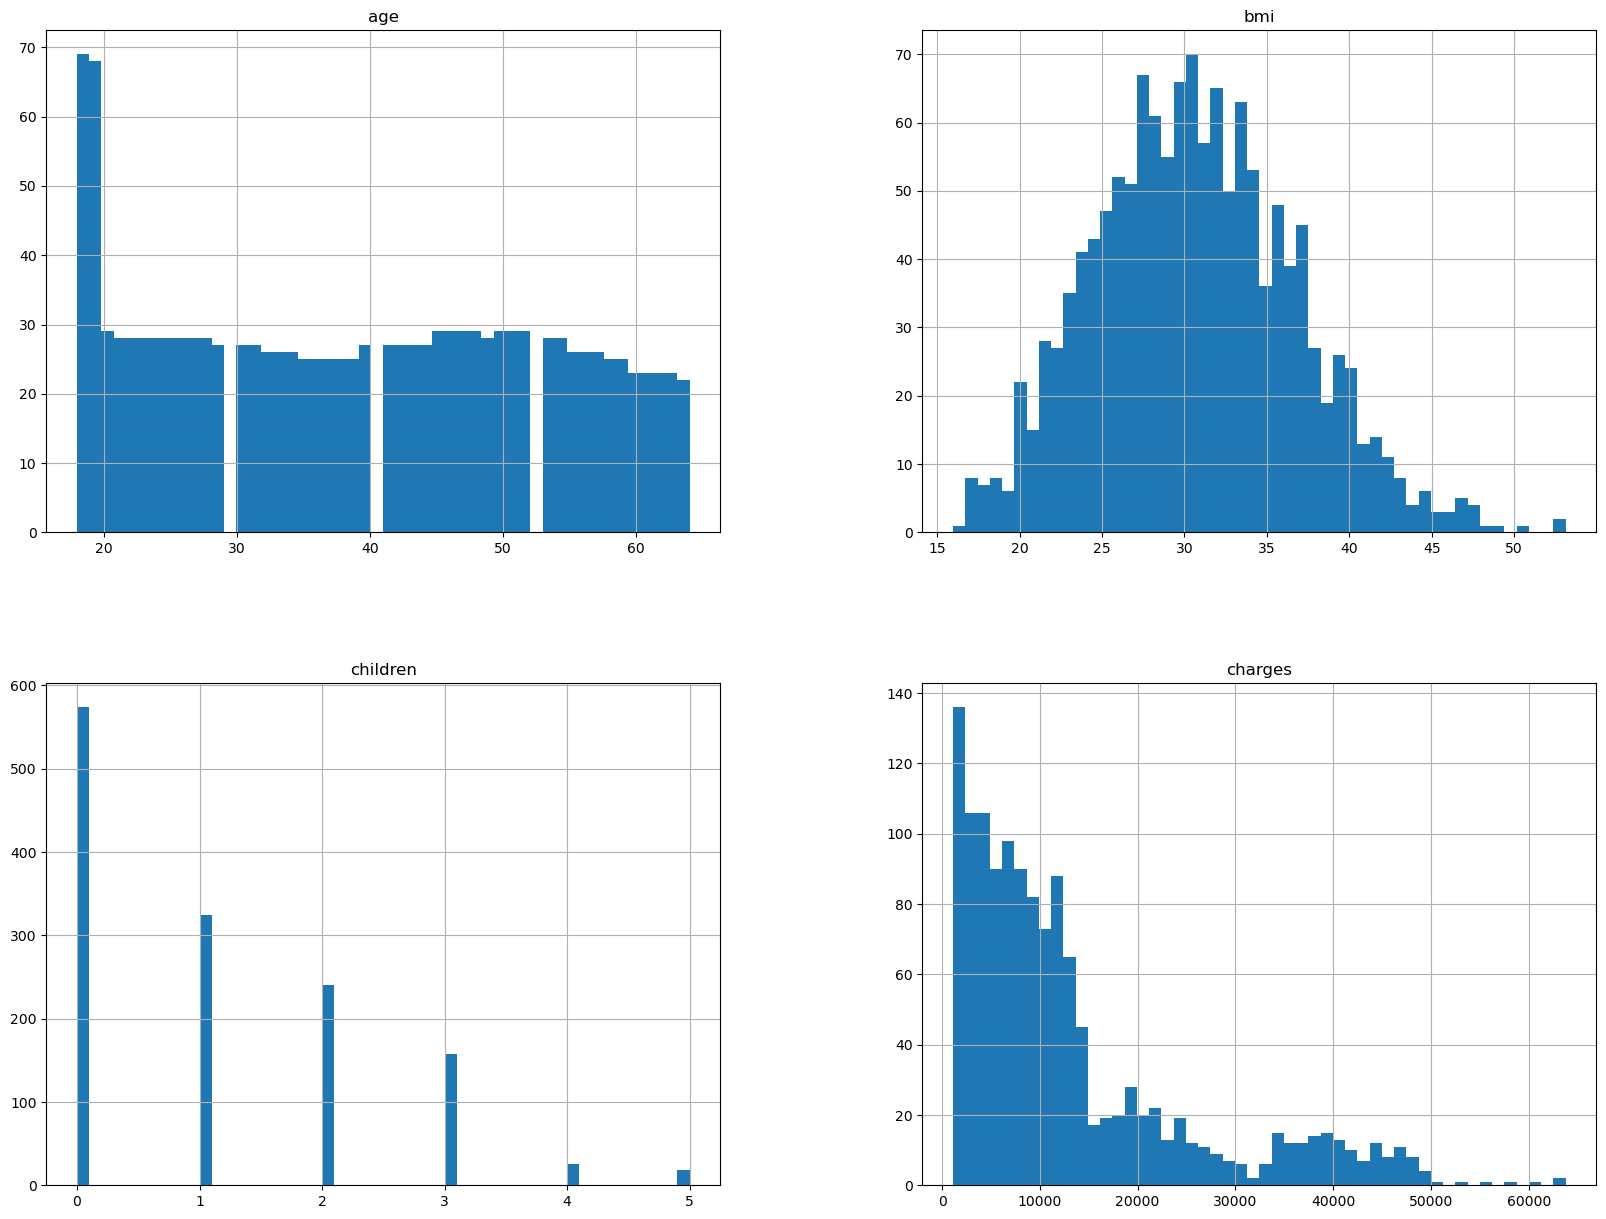

In [7]:
#plot the data
data.hist(bins=50, figsize=(20,15))

In [14]:
#convert object to category
for label in data.columns:
    if data[label].dtype == 'object':
        data[label] = data[label].astype('category')
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [15]:
#one hot encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [17]:
dataX  = data.drop('charges', axis=1)
dataY = data['charges']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

33596915.85136146


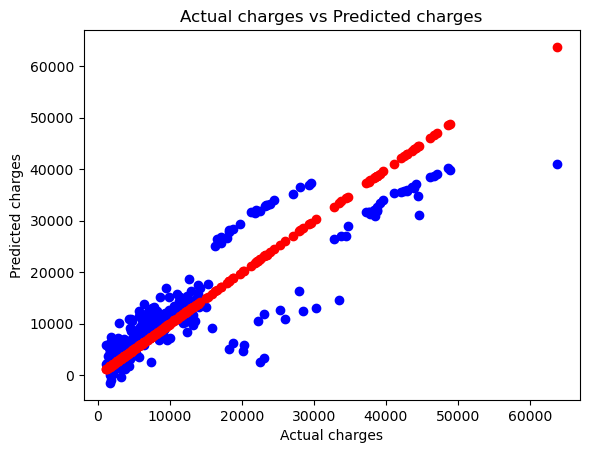

In [25]:
#plot the data, color y_test blue and y_pred red
plt.scatter(y_test, y_pred, color='blue')
plt.scatter(y_test, y_test, color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs Predicted charges')
plt.show()


In [26]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': np.logspace(-3, 3, 13)}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_)

{'alpha': 1.0}


In [27]:
#Use best hyperparameter
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [28]:
print(mean_squared_error(y_test, y_pred))

33645037.09177903


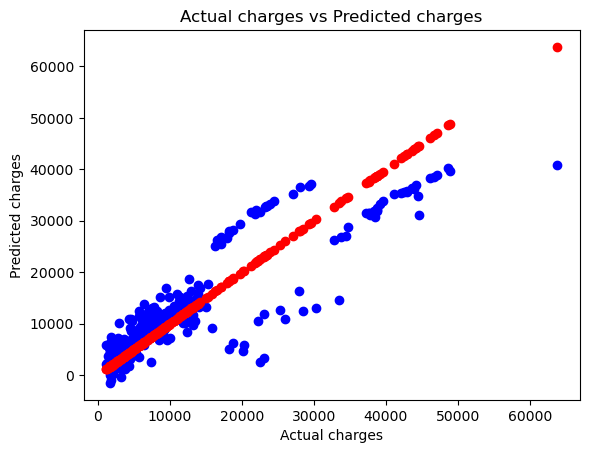

In [29]:
#plot the data, color y_test blue and y_pred red
plt.scatter(y_test, y_pred, color='blue')
plt.scatter(y_test, y_test, color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual charges vs Predicted charges')
plt.show()


In [30]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
param_grid = {'alpha': np.logspace(-3, 3, 13)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])})

In [31]:
print(lasso_cv.best_params_)

{'alpha': 100.0}


In [32]:
best_lasso = Lasso(alpha=100.0)
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_test)

print(mean_squared_error(y_test, y_pred))

34245278.345488146
